<a href="https://colab.research.google.com/github/aetev/Learning-stuff-/blob/main/storgae/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install sklearn
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=4e86ebe10d74d9c23032631c87150cef663178b32bdb8e86580e0d01e3682c73
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import tensorflow as tf
from scipy import signal
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [83]:

def lowpass_filter(data, cutoff, order):
  nyq = 0.5 * data.shape[-1]
  b, a = signal.butter(order, cutoff/nyq, 'lowpass')
  zi = signal.lfilter_zi(b, a)
  y, _ = signal.lfilter(b, a, data, zi=zi*data[0])
  return y

def SamplesToFreq(x,sample_rate):
  frequency = sample_rate / x
  return frequency

In [189]:

data = pd.read_csv('/content/drive/MyDrive/eurusd_hour.csv')
data.dropna()
close = data.pop('BC')

data.pop('Date')
data.pop('Time')
data = (data-data.min())/(data.max()-data.min())

target = close.shift(+1).ffill()
target = target.fillna(0)
target = np.diff(target,prepend=True,)
target = (target-target.min())/(target.max()-target.min())


print(data)
print(target)


             BO        BH        BL       BCh        AO        AH        AL  \
0      0.441285  0.437896  0.442371  0.438755  0.441440  0.438050  0.442516   
1      0.439871  0.437190  0.442194  0.449611  0.440025  0.437345  0.442339   
2      0.439694  0.438249  0.442548  0.467704  0.439849  0.438403  0.442693   
3      0.441108  0.439131  0.444140  0.453230  0.441263  0.439285  0.444285   
4      0.441285  0.439131  0.443963  0.458657  0.441440  0.439285  0.444108   
...         ...       ...       ...       ...       ...       ...       ...   
93079  0.089558  0.090920  0.092278  0.470056  0.090041  0.090944  0.092551   
93080  0.091166  0.090426  0.093127  0.459924  0.091190  0.090450  0.093171   
93081  0.091802  0.089809  0.093693  0.446173  0.091774  0.089974  0.093719   
93082  0.091113  0.088962  0.093835  0.454315  0.092657  0.090045  0.094728   
93083  0.091467  0.089315  0.094330  0.455944  0.091738  0.089427  0.094480   

             AC       ACh  
0      0.439943  0.4360

In [190]:
from keras.regularizers import Regularizer
reg = tf.keras.regularizers.L2(l2=0.01)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(25, activation='relu',kernel_regularizer=reg),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(50, activation='relu',kernel_regularizer=reg),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(50, activation='relu',kernel_regularizer=reg),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(25, activation='relu',kernel_regularizer=reg),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1)
])
loss_fn = tf.keras.losses.MeanAbsoluteError()
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['RootMeanSquaredError'])

In [ ]:


hist = model.fit(data, target, epochs=100, batch_size=32)

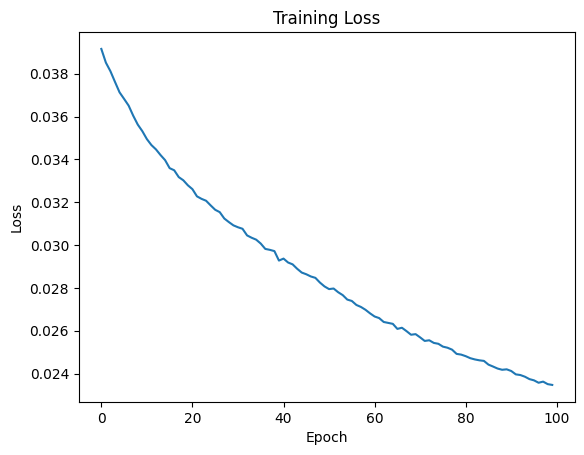

In [149]:
# Plot the training loss
plt.plot(hist.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [150]:
prediction = model.predict(scaled)

2597/2597 [==============================] - 4s 1ms/step


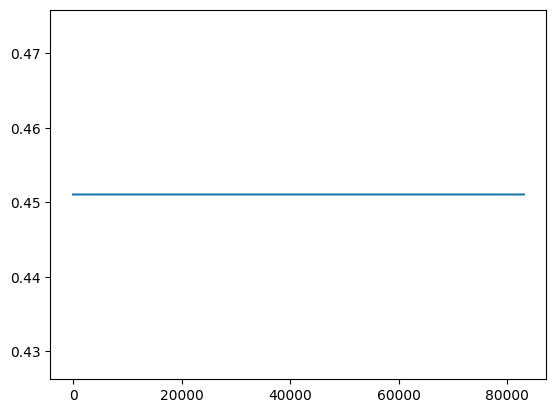

In [151]:
plt.plot(prediction)